In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
df = pd.read_csv('/content/Iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
df.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [8]:
df.isnull().count()

,0
Id,150
SepalLengthCm,150
SepalWidthCm,150
PetalLengthCm,150
PetalWidthCm,150
Species,150


Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


<Axes: xlabel='count', ylabel='Species'>

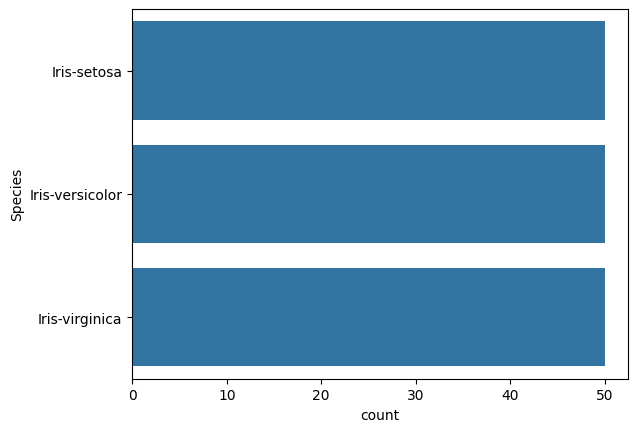

In [9]:
print(df['Species'].value_counts())
sns.countplot(df['Species'])

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


<Axes: ylabel='Species'>

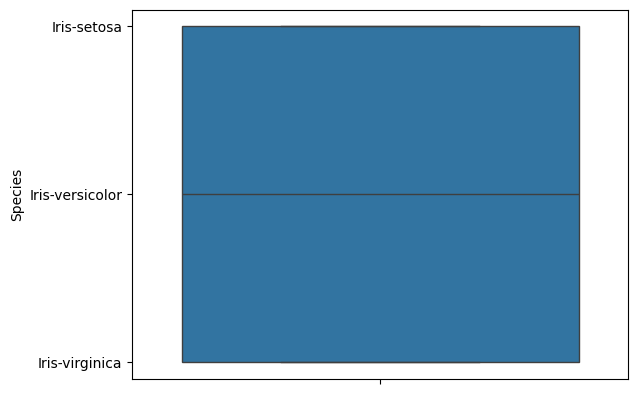

In [10]:
print(df['Species'].value_counts())
sns.boxplot(df['Species'])

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


<Axes: xlabel='Species', ylabel='Count'>

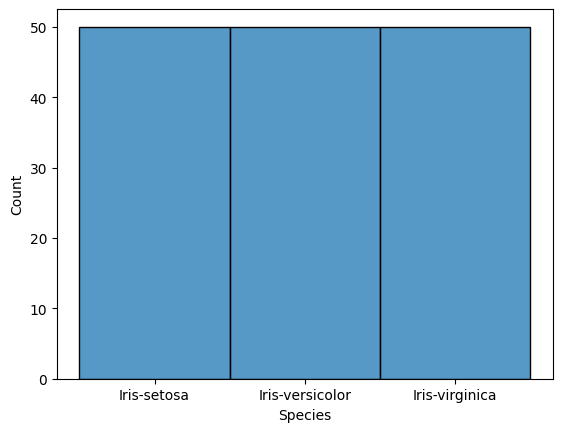

In [11]:
print(df['Species'].value_counts())
sns.histplot(df['Species'])

In [12]:
df.drop("Id", axis=1, inplace = True)

In [13]:
X = df.iloc[:,0:4]
y = df['Species']

In [14]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [15]:
y

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=42)

In [17]:
X_train.shape

(100, 4)

In [18]:
X_test.shape

(50, 4)

In [19]:
y_train.shape

(100,)

In [20]:
y_test.shape

(50,)

DT Gini Index

In [21]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

[Text(0.5416666666666666, 0.9285714285714286, 'x[2] <= 2.45\ngini = 0.666\nsamples = 100\nvalue = [31, 35, 34]'),
 Text(0.4583333333333333, 0.7857142857142857, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.625, 0.7857142857142857, 'x[3] <= 1.75\ngini = 0.5\nsamples = 69\nvalue = [0, 35, 34]'),
 Text(0.4166666666666667, 0.6428571428571429, 'x[2] <= 5.35\ngini = 0.188\nsamples = 38\nvalue = [0, 34, 4]'),
 Text(0.3333333333333333, 0.5, 'x[0] <= 4.95\ngini = 0.105\nsamples = 36\nvalue = [0, 34, 2]'),
 Text(0.16666666666666666, 0.35714285714285715, 'x[1] <= 2.45\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.08333333333333333, 0.21428571428571427, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.25, 0.21428571428571427, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.5, 0.35714285714285715, 'x[1] <= 2.25\ngini = 0.057\nsamples = 34\nvalue = [0, 33, 1]'),
 Text(0.4166666666666667, 0.21428571428571427, 'x[3] <= 1.25\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]

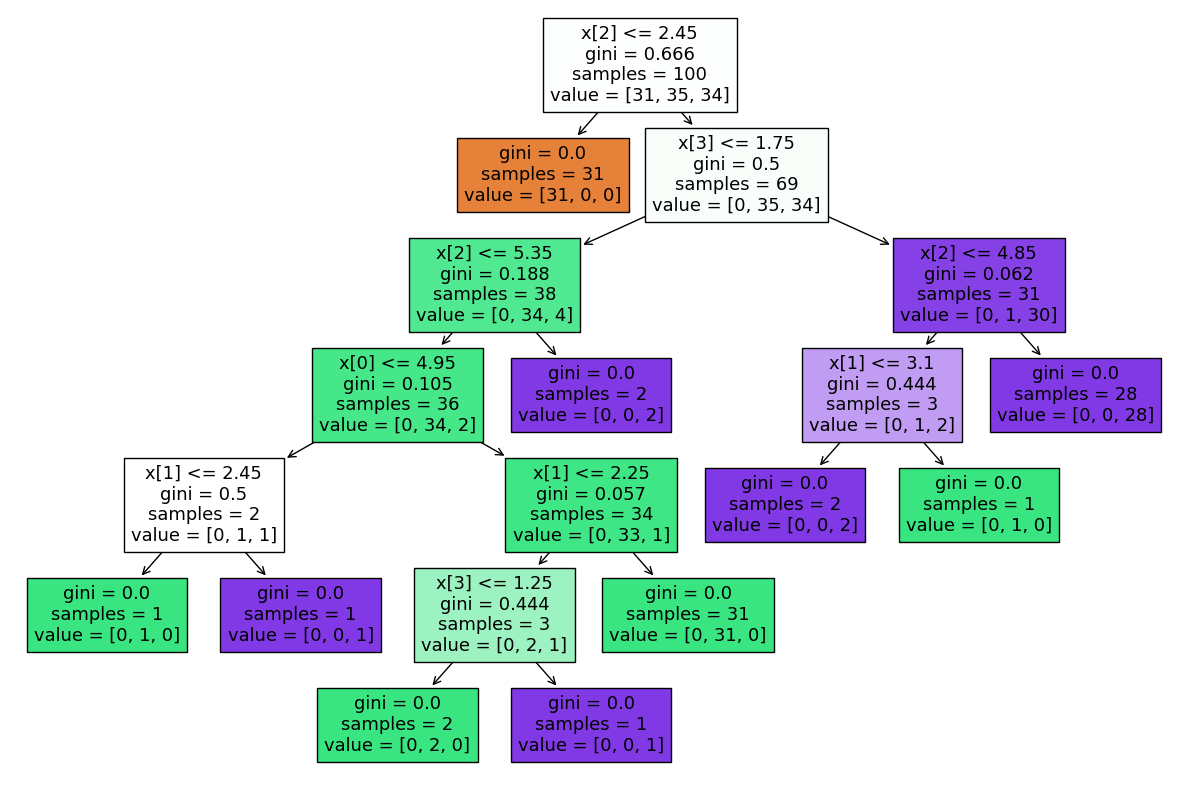

In [22]:
plt.figure(figsize=(15,10))
tree.plot_tree(dt,filled=True)

In [23]:
y_pred = dt.predict(X_test)
y_pred

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica'], dtype=object)

In [24]:
metrics.accuracy_score(y_pred,y_test)

0.96

In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_pred, y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       0.93      0.93      0.93        15
 Iris-virginica       0.94      0.94      0.94        16

       accuracy                           0.96        50
      macro avg       0.96      0.96      0.96        50
   weighted avg       0.96      0.96      0.96        50



<Axes: >

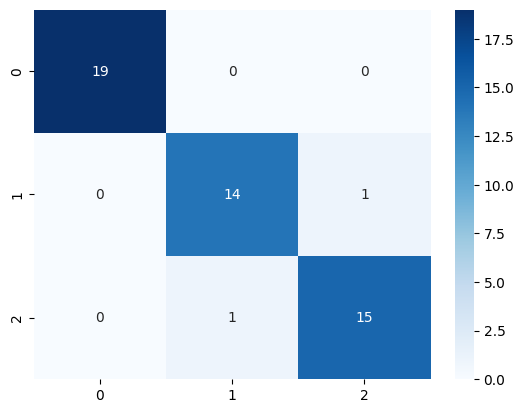

In [26]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred,y_test)
sns.heatmap(cm,annot=True,cmap='Blues')

[Text(0.4, 0.8333333333333334, 'x[3] <= 0.8\ngini = 0.666\nsamples = 100\nvalue = [31, 35, 34]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.6, 0.5, 'x[3] <= 1.75\ngini = 0.5\nsamples = 69\nvalue = [0, 35, 34]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.188\nsamples = 38\nvalue = [0, 34, 4]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.062\nsamples = 31\nvalue = [0, 1, 30]')]

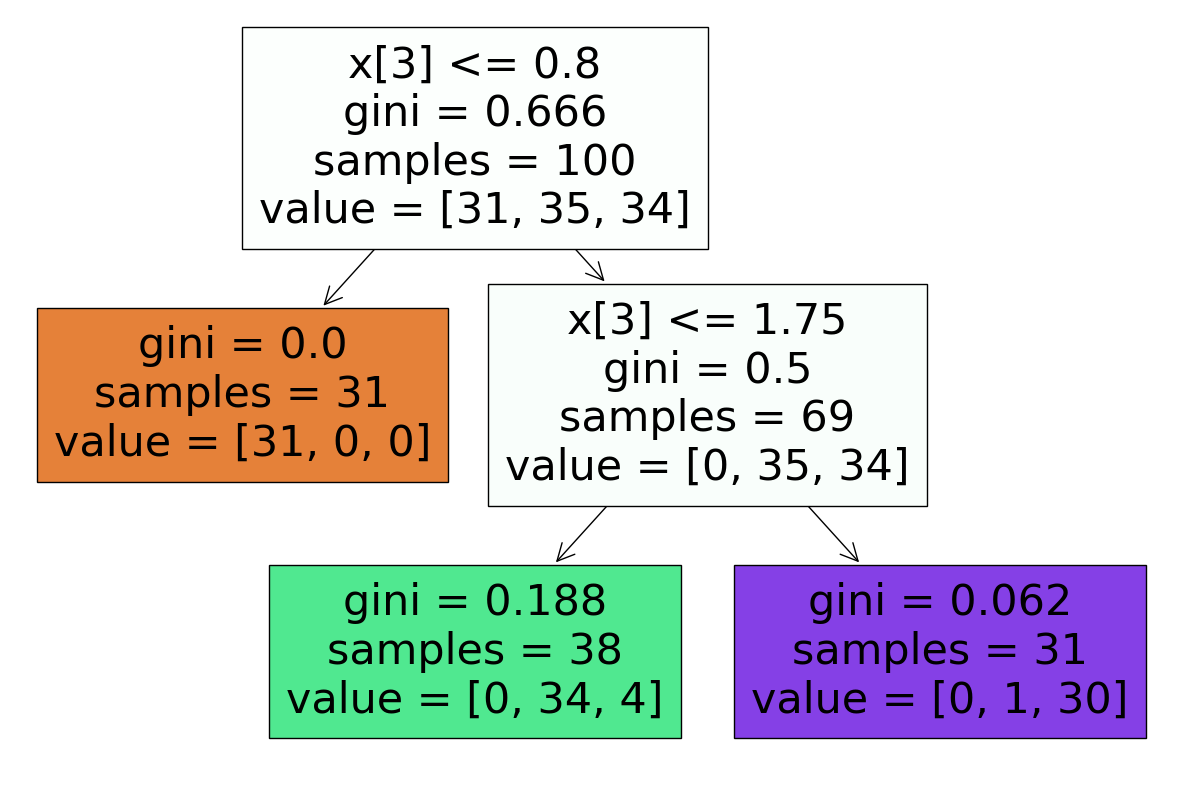

In [27]:
dt1 = DecisionTreeClassifier(max_depth=2)
dt1.fit(X_train,y_train)
plt.figure(figsize=(15,10))
tree.plot_tree(dt1,filled=True)

In [28]:
y_pred1 = dt1.predict(X_test)
y_pred1

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica'], dtype=object)

In [29]:
print(classification_report(y_pred1, y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      0.94      0.97        16
 Iris-virginica       0.94      1.00      0.97        15

       accuracy                           0.98        50
      macro avg       0.98      0.98      0.98        50
   weighted avg       0.98      0.98      0.98        50



<Axes: >

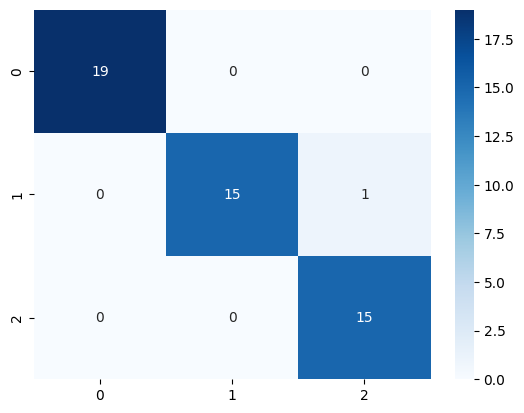

In [30]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred1,y_test)
sns.heatmap(cm,annot=True,cmap='Blues')

In [31]:
parameter = {
 'criterion':['gini','entropy','log_loss'],
 'max_depth':[1,2,3,4,5],
 'max_features':['auto','sqrt','log2'],
 'splitter':['best','random']
 }

In [32]:
#GridSearchCV and fine-tuning the parameters
from sklearn.model_selection import GridSearchCV
treemodel = DecisionTreeClassifier(max_depth=2)
grid = GridSearchCV(treemodel,param_grid=parameter,cv=5,scoring='accuracy')
grid.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
150 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=2),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [33]:
grid.best_params_

{'criterion': 'log_loss',
 'max_depth': 5,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [36]:
y_pred2 = grid.predict(X_test)

In [37]:
y_pred2

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica'], dtype=object)

In [38]:
print(classification_report(y_test,y_pred2))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       0.93      0.93      0.93        15
 Iris-virginica       0.94      0.94      0.94        16

       accuracy                           0.96        50
      macro avg       0.96      0.96      0.96        50
   weighted avg       0.96      0.96      0.96        50



<Axes: >

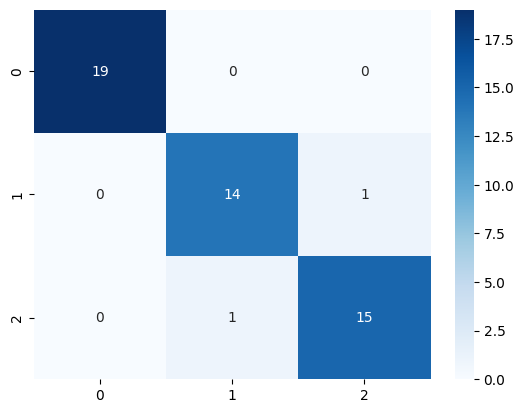

In [39]:
cm = confusion_matrix(y_test,y_pred2)
sns.heatmap(cm,annot=True,cmap='Blues')

In [40]:
df1= pd.read_csv('/content/titanic_dataset (1).csv')

In [41]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [42]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     882 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [43]:
df1.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [44]:
df1.shape

(891, 12)

In [45]:
df1.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [46]:
df1['Age'].fillna(df1['Age'].median(), inplace= True)

In [62]:
df1.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked_Q,0
Embarked_S,0


In [48]:
df1['Sex'] = df1['Sex'].map({'male':0,'female':1})

In [49]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [50]:
print(df1['Sex'])

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: int64


In [51]:
df1=pd.get_dummies(df1 , columns=['Embarked'],drop_first=True)
print(df1)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name  Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    0  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1   
2                               Heikkinen, Miss. Laina    1  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1   
4                             Allen, Mr. William Henry    0  35.0      0   
..                                                 ...  ...   ...    ...   
886        

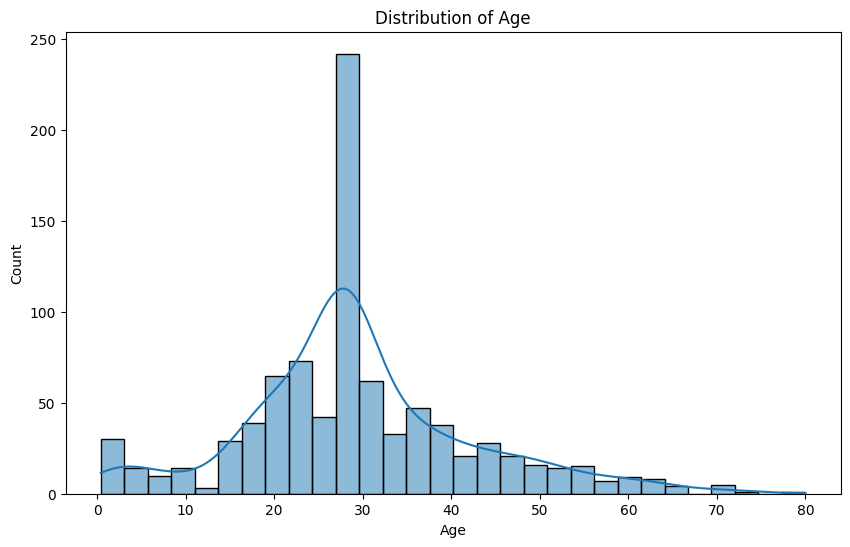

In [52]:
#Univariate
plt.figure(figsize=(10,6))
sns.histplot(df1['Age'],bins=30,kde=True)
plt.title('Distribution of Age')
plt.show()

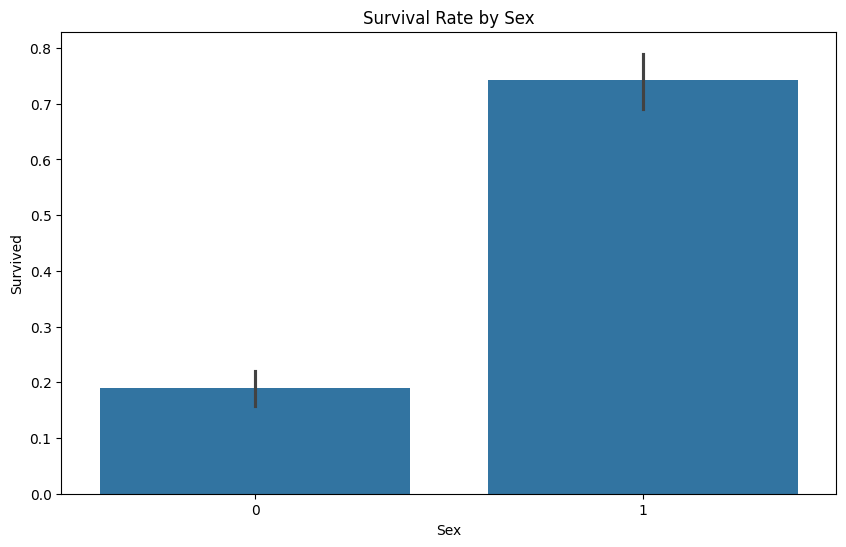

In [53]:
#Bivariate
plt.figure(figsize=(10,6))
sns.barplot(x='Sex',y='Survived',data=df1)
plt.title('Survival Rate by Sex')
plt.show()

In [54]:
df1=df1.drop(['Name','Ticket','Cabin'],axis=1)

In [55]:
df1.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,1,0,3,0,22.0,1,0,7.2500,False,True
1,2,1,1,1,38.0,1,0,71.2833,False,False
2,3,1,3,1,26.0,0,0,7.9250,False,True
3,4,1,1,1,35.0,1,0,53.1000,False,True
4,5,0,3,0,35.0,0,0,8.0500,False,True


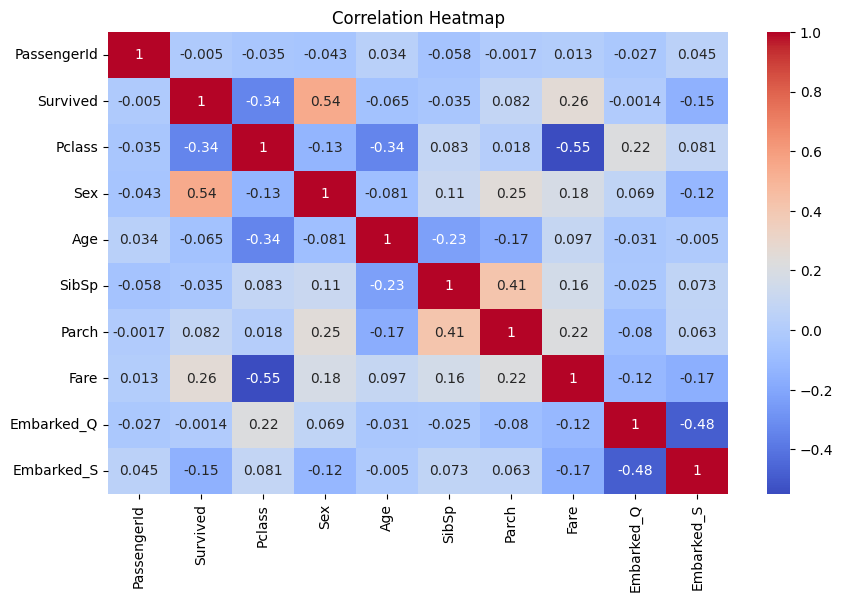

In [56]:
#Multi-variate
plt.figure(figsize=(10,6))
sns.heatmap(df1.corr(),annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [57]:
df = df1.drop(['PassengerId','SibSp','Parch','Fare','Embarked_Q','Embarked_S'],axis=1)
print(df)

     Survived  Pclass  Sex   Age
0           0       3    0  22.0
1           1       1    1  38.0
2           1       3    1  26.0
3           1       1    1  35.0
4           0       3    0  35.0
..        ...     ...  ...   ...
886         0       2    0  27.0
887         1       1    1  19.0
888         0       3    1  28.0
889         1       1    0  26.0
890         0       3    0  32.0

[891 rows x 4 columns]


In [65]:
from sklearn.model_selection import train_test_split
X = df.drop('Survived',axis=1)
y = df['Survived']

In [66]:
print(X)

     Pclass  Sex   Age
0         3    0  22.0
1         1    1  38.0
2         3    1  26.0
3         1    1  35.0
4         3    0  35.0
..      ...  ...   ...
886       2    0  27.0
887       1    1  19.0
888       3    1  28.0
889       1    0  26.0
890       3    0  32.0

[891 rows x 3 columns]


In [67]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [68]:
X_train.shape

(712, 3)

In [69]:
X_test.shape

(179, 3)

In [70]:
y_train.shape

(712,)

In [71]:
y_test.shape

(179,)

In [73]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

[Text(0.48298104956268223, 0.9705882352941176, 'x[1] <= 0.5\ngini = 0.469\nsamples = 712\nvalue = [444, 268]'),
 Text(0.155466472303207, 0.9117647058823529, 'x[2] <= 6.5\ngini = 0.303\nsamples = 467\nvalue = [380, 87]'),
 Text(0.027988338192419825, 0.8529411764705882, 'x[0] <= 2.5\ngini = 0.434\nsamples = 22\nvalue = [7, 15]'),
 Text(0.018658892128279883, 0.7941176470588235, 'gini = 0.0\nsamples = 9\nvalue = [0, 9]'),
 Text(0.037317784256559766, 0.7941176470588235, 'x[2] <= 2.5\ngini = 0.497\nsamples = 13\nvalue = [7, 6]'),
 Text(0.018658892128279883, 0.7352941176470589, 'x[2] <= 0.71\ngini = 0.408\nsamples = 7\nvalue = [5, 2]'),
 Text(0.009329446064139942, 0.6764705882352942, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.027988338192419825, 0.6764705882352942, 'x[2] <= 1.5\ngini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(0.018658892128279883, 0.6176470588235294, 'gini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.037317784256559766, 0.6176470588235294, 'gini = 0.0\nsamples 

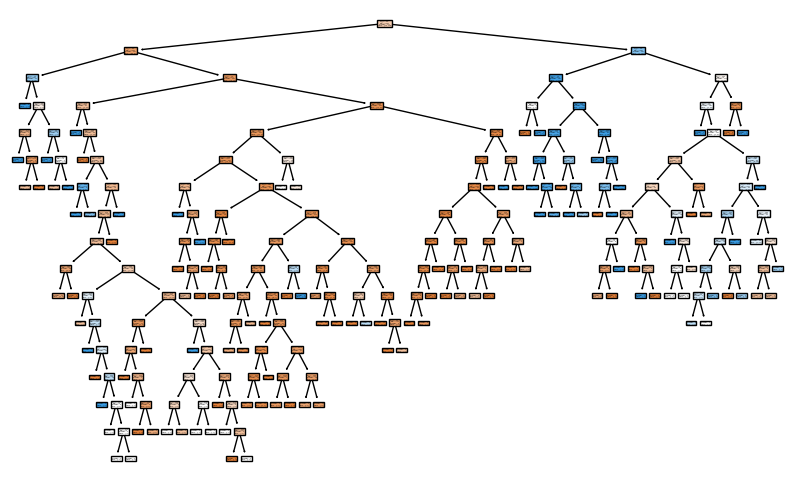

In [74]:
from sklearn import tree
plt.figure(figsize=(10,6))
tree.plot_tree(dt,filled=True)

In [76]:
y_pred3 = dt.predict(X_test)
y_pred3

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1])

In [78]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       105
           1       0.76      0.68      0.71        74

    accuracy                           0.78       179
   macro avg       0.77      0.76      0.77       179
weighted avg       0.78      0.78      0.77       179



<Axes: >

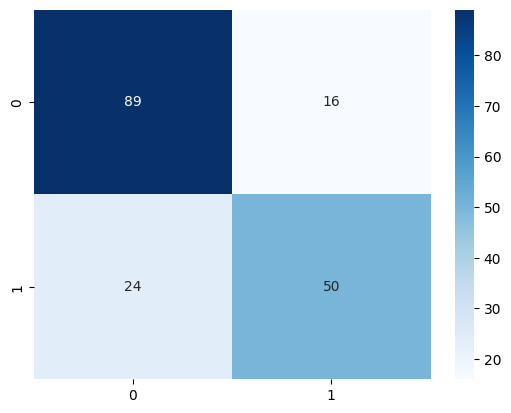

In [79]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred3)
sns.heatmap(cm,annot=True,cmap='Blues')

In [80]:
dt1 =  DecisionTreeClassifier(max_depth=5)
dt1.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

[Text(0.4864864864864865, 0.9166666666666666, 'x[1] <= 0.5\ngini = 0.469\nsamples = 712\nvalue = [444, 268]'),
 Text(0.20945945945945946, 0.75, 'x[2] <= 6.5\ngini = 0.303\nsamples = 467\nvalue = [380, 87]'),
 Text(0.08108108108108109, 0.5833333333333334, 'x[0] <= 2.5\ngini = 0.434\nsamples = 22\nvalue = [7, 15]'),
 Text(0.05405405405405406, 0.4166666666666667, 'gini = 0.0\nsamples = 9\nvalue = [0, 9]'),
 Text(0.10810810810810811, 0.4166666666666667, 'x[2] <= 2.5\ngini = 0.497\nsamples = 13\nvalue = [7, 6]'),
 Text(0.05405405405405406, 0.25, 'x[2] <= 0.71\ngini = 0.408\nsamples = 7\nvalue = [5, 2]'),
 Text(0.02702702702702703, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.08108108108108109, 0.08333333333333333, 'gini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(0.16216216216216217, 0.25, 'x[2] <= 3.5\ngini = 0.444\nsamples = 6\nvalue = [2, 4]'),
 Text(0.13513513513513514, 0.08333333333333333, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.189189189189189

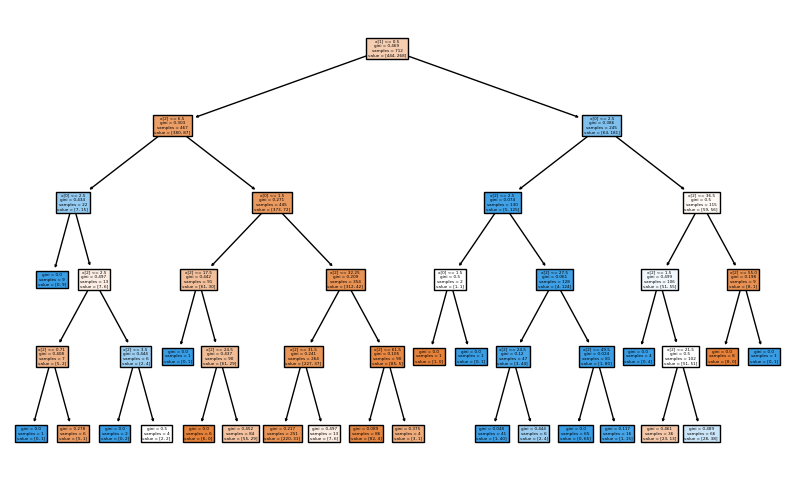

In [81]:
plt.figure(figsize=(10,6))
tree.plot_tree(dt1,filled=True)

In [82]:
y_pred4 = dt1.predict(X_test)
y_pred4

array([0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0])

In [84]:
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.77      0.90      0.83       105
           1       0.82      0.61      0.70        74

    accuracy                           0.78       179
   macro avg       0.79      0.76      0.76       179
weighted avg       0.79      0.78      0.78       179



<Axes: >

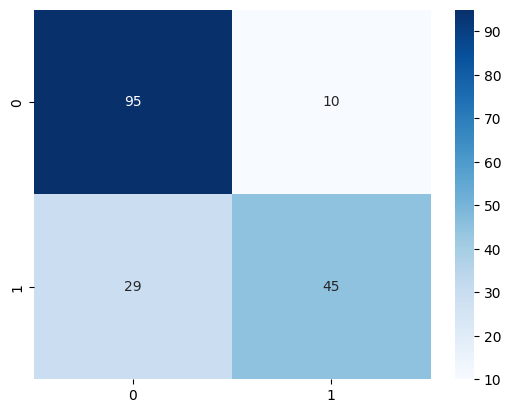

In [86]:
 cm=confusion_matrix(y_test,y_pred4)
 sns.heatmap(cm,annot=True,cmap='Blues')

In [87]:
#Entropy gain
dt2=DecisionTreeClassifier(criterion='entropy')
dt2.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

[Text(0.4776408520214782, 0.9705882352941176, 'x[1] <= 0.5\nentropy = 0.955\nsamples = 712\nvalue = [444, 268]'),
 Text(0.1605880843335439, 0.9117647058823529, 'x[2] <= 6.5\nentropy = 0.694\nsamples = 467\nvalue = [380, 87]'),
 Text(0.030322173089071383, 0.8529411764705882, 'x[0] <= 2.5\nentropy = 0.902\nsamples = 22\nvalue = [7, 15]'),
 Text(0.02021478205938092, 0.7941176470588235, 'entropy = 0.0\nsamples = 9\nvalue = [0, 9]'),
 Text(0.04042956411876184, 0.7941176470588235, 'x[2] <= 2.5\nentropy = 0.996\nsamples = 13\nvalue = [7, 6]'),
 Text(0.02021478205938092, 0.7352941176470589, 'x[2] <= 0.71\nentropy = 0.863\nsamples = 7\nvalue = [5, 2]'),
 Text(0.01010739102969046, 0.6764705882352942, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.030322173089071383, 0.6764705882352942, 'x[2] <= 1.5\nentropy = 0.65\nsamples = 6\nvalue = [5, 1]'),
 Text(0.02021478205938092, 0.6176470588235294, 'entropy = 0.918\nsamples = 3\nvalue = [2, 1]'),
 Text(0.04042956411876184, 0.6176470588235294, '

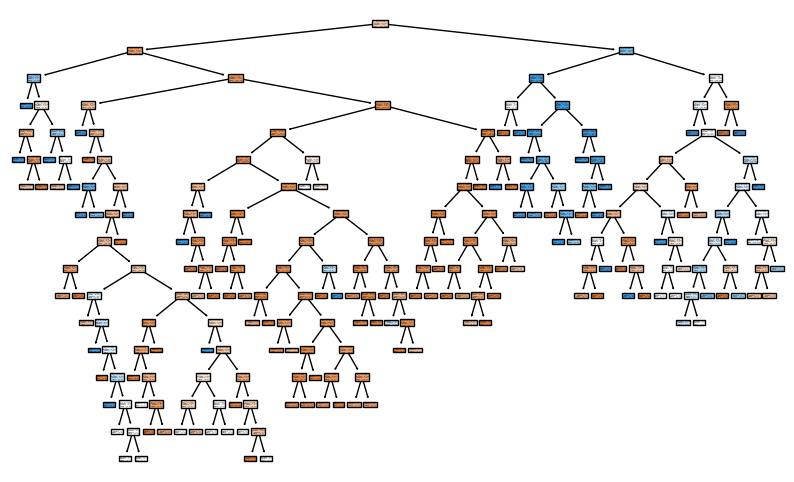

In [88]:
plt.figure(figsize=(10,6))
tree.plot_tree(dt2,filled=True)

In [89]:
y_pred5 = dt2.predict(x_test)
y_pred5

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1])

In [90]:
print(classification_report(y_test,y_pred5))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       105
           1       0.76      0.68      0.71        74

    accuracy                           0.78       179
   macro avg       0.77      0.76      0.77       179
weighted avg       0.78      0.78      0.77       179



In [92]:
dt3 = DecisionTreeClassifier(max_depth=5,criterion='entropy')
dt3.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [93]:
plt.figure(figsize=(10,6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>